In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 数据整型

In [7]:
tuples =list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [8]:
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [9]:
df = pd.DataFrame(np.random.randn(8,2), index=index,columns=['A','B'])
df

A         B
first second                    
bar   one    -1.665837 -1.424310
      two    -0.141271 -0.014858
baz   one    -0.077566  0.744656
      two    -1.129370  0.796641
foo   one     0.336380 -1.416431
      two     0.298238 -1.053190
qux   one     1.175172 -0.454645
      two     1.283872  1.318517

In [10]:
df.loc['bar'].loc['one']

A   -1.665837
B   -1.424310
Name: one, dtype: float64

In [11]:
#
stacked = df.stack()
stacked

first  second   
bar    one     A   -1.665837
               B   -1.424310
       two     A   -0.141271
               B   -0.014858
baz    one     A   -0.077566
               B    0.744656
       two     A   -1.129370
               B    0.796641
foo    one     A    0.336380
               B   -1.416431
       two     A    0.298238
               B   -1.053190
qux    one     A    1.175172
               B   -0.454645
       two     A    1.283872
               B    1.318517
dtype: float64

In [12]:
stacked.index

MultiIndex([('bar', 'one', 'A'),
            ('bar', 'one', 'B'),
            ('bar', 'two', 'A'),
            ('bar', 'two', 'B'),
            ('baz', 'one', 'A'),
            ('baz', 'one', 'B'),
            ('baz', 'two', 'A'),
            ('baz', 'two', 'B'),
            ('foo', 'one', 'A'),
            ('foo', 'one', 'B'),
            ('foo', 'two', 'A'),
            ('foo', 'two', 'B'),
            ('qux', 'one', 'A'),
            ('qux', 'one', 'B'),
            ('qux', 'two', 'A'),
            ('qux', 'two', 'B')],
           names=['first', 'second', None])

In [13]:
stacked.unstack()
# stacked.unstack(1)
# stacked.unstack(2)

A         B
first second                    
bar   one    -1.665837 -1.424310
      two    -0.141271 -0.014858
baz   one    -0.077566  0.744656
      two    -1.129370  0.796641
foo   one     0.336380 -1.416431
      two     0.298238 -1.053190
qux   one     1.175172 -0.454645
      two     1.283872  1.318517

In [14]:
stacked.unstack().unstack()

A                   B          
second       one       two       one       two
first                                         
bar    -1.665837 -0.141271 -1.424310 -0.014858
baz    -0.077566 -1.129370  0.744656  0.796641
foo     0.336380  0.298238 -1.416431 -1.053190
qux     1.175172  1.283872 -0.454645  1.318517

# 数据透视表
# pviot table/轴向旋转表

In [15]:
df = pd.DataFrame({'A':['one','one','two','three']*3,
              'B':['A','B','C']*4,
              'C':['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
              'D':np.random.randn(12),
              'E':np.random.randn(12)
              })
df

,A,B,C,D,E
0,one,A,foo,0.790629,-1.039295
1,one,B,foo,-1.825176,-0.904315
2,two,C,foo,1.627930,0.399284
3,three,A,bar,1.322256,1.571481
4,one,B,bar,-0.359093,-0.649856
5,one,C,bar,0.003862,-0.316731
6,two,A,foo,1.098788,0.258952
7,three,B,foo,0.396739,-0.287395
8,one,C,foo,0.607065,1.439628
9,one,A,bar,0.119201,0.124964


In [16]:
df.pivot_table(values=['D'], index=['A','B'], columns='C')
# pd.pivot_table(df,values=['D'], index=['A','B'], columns='C')

D          
C             bar       foo
A     B                    
one   A  0.119201  0.790629
      B -0.359093 -1.825176
      C  0.003862  0.607065
three A  1.322256       NaN
      B       NaN  0.396739
      C  0.029979       NaN
two   A       NaN  1.098788
      B -0.038360       NaN
      C       NaN  1.627930

In [17]:
df.pivot_table(values=['E'],index=['A'],columns=['C'])

E          
C           bar       foo
A                        
one   -0.280541 -0.167994
three  0.591084 -0.287395
two   -0.398616  0.329118

In [18]:
df[df.A=='one'].groupby('C').mean()

,D,E
C,,
bar,-0.078677,-0.280541
foo,-0.142494,-0.167994


# 时间序列
pandas 提供了强大的时间序列功能，比如把秒级的股票数据转换为5分钟周期数据等。

In [19]:
rng = pd.date_range('20160301',periods=600,freq='s')
rng

DatetimeIndex(['2016-03-01 00:00:00', '2016-03-01 00:00:01',
               '2016-03-01 00:00:02', '2016-03-01 00:00:03',
               '2016-03-01 00:00:04', '2016-03-01 00:00:05',
               '2016-03-01 00:00:06', '2016-03-01 00:00:07',
               '2016-03-01 00:00:08', '2016-03-01 00:00:09',
               ...
               '2016-03-01 00:09:50', '2016-03-01 00:09:51',
               '2016-03-01 00:09:52', '2016-03-01 00:09:53',
               '2016-03-01 00:09:54', '2016-03-01 00:09:55',
               '2016-03-01 00:09:56', '2016-03-01 00:09:57',
               '2016-03-01 00:09:58', '2016-03-01 00:09:59'],
              dtype='datetime64[ns]', length=600, freq='S')

In [21]:
s = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
s

2016-03-01 00:00:00    387
2016-03-01 00:00:01    475
2016-03-01 00:00:02    452
2016-03-01 00:00:03    162
2016-03-01 00:00:04    484
                      ... 
2016-03-01 00:09:55    291
2016-03-01 00:09:56    190
2016-03-01 00:09:57    139
2016-03-01 00:09:58    188
2016-03-01 00:09:59    337
Freq: S, Length: 600, dtype: int64

In [22]:
ts = s.to_period()
ts

2016-03-01 00:00:00    387
2016-03-01 00:00:01    475
2016-03-01 00:00:02    452
2016-03-01 00:00:03    162
2016-03-01 00:00:04    484
                      ... 
2016-03-01 00:09:55    291
2016-03-01 00:09:56    190
2016-03-01 00:09:57    139
2016-03-01 00:09:58    188
2016-03-01 00:09:59    337
Freq: S, Length: 600, dtype: int64

In [23]:
ts = ts.to_timestamp()
ts

2016-03-01 00:00:00    387
2016-03-01 00:00:01    475
2016-03-01 00:00:02    452
2016-03-01 00:00:03    162
2016-03-01 00:00:04    484
                      ... 
2016-03-01 00:09:55    291
2016-03-01 00:09:56    190
2016-03-01 00:09:57    139
2016-03-01 00:09:58    188
2016-03-01 00:09:59    337
Freq: S, Length: 600, dtype: int64

In [24]:
s.resample('2Min').mean()
# ts.resample('2Min', how='sum') failure

2016-03-01 00:00:00    231.708333
2016-03-01 00:02:00    237.866667
2016-03-01 00:04:00    259.783333
2016-03-01 00:06:00    251.850000
2016-03-01 00:08:00    256.108333
Freq: 2T, dtype: float64

在不同时间表达式内转换

In [25]:
rng = pd.period_range('2000Q1','2016Q1',freq='Q')
rng



PeriodIndex(['2000Q1', '2000Q2', '2000Q3', '2000Q4', '2001Q1', '2001Q2',
             '2001Q3', '2001Q4', '2002Q1', '2002Q2', '2002Q3', '2002Q4',
             '2003Q1', '2003Q2', '2003Q3', '2003Q4', '2004Q1', '2004Q2',
             '2004Q3', '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4',
             '2006Q1', '2006Q2', '2006Q3', '2006Q4', '2007Q1', '2007Q2',
             '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4',
             '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
             '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4',
             '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
             '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
             '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [26]:
rng.to_timestamp()

DatetimeIndex(['2000-01-01', '2000-04-01', '2000-07-01', '2000-10-01',
               '2001-01-01', '2001-04-01', '2001-07-01', '2001-10-01',
               '2002-01-01', '2002-04-01', '2002-07-01', '2002-10-01',
               '2003-01-01', '2003-04-01', '2003-07-01', '2003-10-01',
               '2004-01-01', '2004-04-01', '2004-07-01', '2004-10-01',
               '2005-01-01', '2005-04-01', '2005-07-01', '2005-10-01',
               '2006-01-01', '2006-04-01', '2006-07-01', '2006-10-01',
               '2007-01-01', '2007-04-01', '2007-07-01', '2007-10-01',
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
      

In [27]:
pd.Timestamp('20160301') - pd.Timestamp('20160201')

Timedelta('29 days 00:00:00')

In [28]:
pd.Timestamp('20160301') + pd.Timedelta(days=5)

Timestamp('2016-03-06 00:00:00')

# 类别数据
Categorical 是 pandas 0.15 版本才加入的新功能。用来表达类别数据。

In [29]:
df = pd.DataFrame({'id':[1,2,3,4,5,6],'raw_grade':['a','b','d','d','a','b']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,d
3,4,d
4,5,a
5,6,b


In [30]:
df['grade'] = df.raw_grade.astype('category')
df.grade

0    a
1    b
2    d
3    d
4    a
5    b
Name: grade, dtype: category
Categories (3, object): [a, b, d]

In [31]:
df.grade.cat.categories

Index(['a', 'b', 'd'], dtype='object')

In [32]:
df.grade.cat.categories = ['very good','good', 'bad']
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,d,bad
3,4,d,bad
4,5,a,very good
5,6,b,good


In [33]:
df.sort_values(by='grade',ascending=False)

,id,raw_grade,grade
2,3,d,bad
3,4,d,bad
1,2,b,good
5,6,b,good
0,1,a,very good
4,5,a,very good


In [34]:
s = pd.Series(np.random.randn(1000),index=pd.date_range('20000101',periods=1000))
s

2000-01-01   -1.673158
2000-01-02   -0.765142
2000-01-03    0.777250
2000-01-04    0.193263
2000-01-05    0.685959
                ...   
2002-09-22   -1.465747
2002-09-23    0.004825
2002-09-24    0.238439
2002-09-25    0.039487
2002-09-26   -0.157407
Freq: D, Length: 1000, dtype: float64

In [35]:
s = s.cumsum()

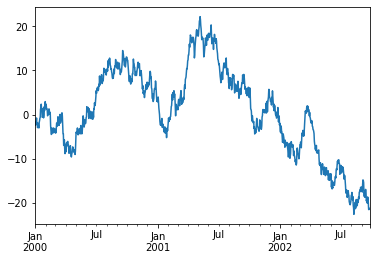

In [36]:
s = s.plot()

In [37]:
df = pd.DataFrame(np.random.randn(100,4), columns=list('ABCD'))
df

,A,B,C,D
0,-0.428490,-0.396381,-0.473957,-0.556750
1,-0.387848,1.483454,0.129753,-0.417024
2,1.548396,1.311216,-0.400603,1.141239
3,-1.023868,0.976802,-0.132711,-0.130323
4,1.353663,-0.990014,1.261553,0.498696
...,...,...,...,...
95,-0.608433,-1.723088,-0.259079,1.561197
96,0.012569,0.364154,-0.911368,-0.176425
97,-1.202575,0.508102,0.828572,-2.058489
98,-1.492914,0.031363,0.077484,-0.529433


In [38]:
df.to_csv('data.csv')

In [39]:
%ls

data.csv              pandas_intro.ipynb    series_intro.ipynb
numpy.ipynb           pandas_intro_3.ipynb  test1.ipynb


In [40]:
%more data.csv

In [41]:
pd.read_csv('data.csv',index_col=0)

,A,B,C,D
0,-0.428490,-0.396381,-0.473957,-0.556750
1,-0.387848,1.483454,0.129753,-0.417024
2,1.548396,1.311216,-0.400603,1.141239
3,-1.023868,0.976802,-0.132711,-0.130323
4,1.353663,-0.990014,1.261553,0.498696
...,...,...,...,...
95,-0.608433,-1.723088,-0.259079,1.561197
96,0.012569,0.364154,-0.911368,-0.176425
97,-1.202575,0.508102,0.828572,-2.058489
98,-1.492914,0.031363,0.077484,-0.529433


In [54]:
ts = pd.date_range('20190101',periods=5,freq='M')
ts

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31'],
              dtype='datetime64[ns]', freq='M')

In [55]:
sd = pd.Series(np.random.randn(5),index=ts)
sd

2019-01-31   -0.144036
2019-02-28   -0.538820
2019-03-31   -0.667488
2019-04-30    1.785844
2019-05-31    0.269508
Freq: M, dtype: float64

In [56]:
ts = sd.to_period()
ts

2019-01   -0.144036
2019-02   -0.538820
2019-03   -0.667488
2019-04    1.785844
2019-05    0.269508
Freq: M, dtype: float64

In [57]:
ts.to_timestamp()

2019-01-01   -0.144036
2019-02-01   -0.538820
2019-03-01   -0.667488
2019-04-01    1.785844
2019-05-01    0.269508
Freq: MS, dtype: float64